Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the MNIST handwritten numbers datasets

In [2]:
training_data = pd.read_csv("C:/Users/lucif/Documents/Jupiter_Notebook/Datasets/mnist_train.csv")

In [3]:
training_data['label'].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=int64)

Separating and One Hot Encoding the labels from data

In [4]:
labels = training_data['label']

In [5]:
C = np.eye(10,10)[labels]

In [6]:
C

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [7]:
training_data.drop(['label'],axis=1,inplace=True)

In [8]:
training_data.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
training_data = np.array(training_data)

In [10]:
training_data.shape

(60000, 784)



Funtion to return Posterior Probabilities

In [11]:
def softmax_probabilities(t0s,ts,X):
    
    likelihood_probabilities = np.exp(np.matmul(X,ts) + t0s)
    
    #print(likelihood_probabilities.shape)
    
    normalizing_probabilities = np.sum(likelihood_probabilities,axis=1)
    
    normalizing_probabilities = normalizing_probabilities.reshape(normalizing_probabilities.shape[0],1)
    
    #print(normalizing_probabilities.shape)
    
    posterior_probabilities = (likelihood_probabilities/normalizing_probabilities)
    
    return posterior_probabilities



Funtions to return derivatives with respect to wieghts for GDA

In [12]:
def delbydel0s(S,C):
    
    return np.sum((S-C),axis=0)/C.shape[0]

In [13]:
def delbydels(S,C,X):
    
    return np.matmul(X.T,(S-C))/C.shape[0]

Funtion to calculate Loss

In [14]:
def cross_entropy_loss_with_logits(S,C):
    
    return -np.sum((np.log(S)*C))/C.shape[0]

Initializing variables for GDA

In [15]:
epsilon = 10**(-4)

learning_rate = 10**(-5)

iterations = []

neg_log_loss_history = []

t0s_initial = np.zeros((1,10))

ts_initial = np.zeros((784,10))

i = 0

Gradient Descent Algorithm

In [16]:
while(True):
    
    logits_initial = softmax_probabilities(t0s_initial,ts_initial,training_data)
    
    
    
    t0s_final = t0s_initial - (learning_rate * delbydel0s(logits_initial,C))
    
    ts_final = ts_initial - (learning_rate * delbydels(logits_initial,C,training_data))
    
    
    
    logits_final = softmax_probabilities(t0s_final,ts_final,training_data)
    
    
    
    
    
    if abs(cross_entropy_loss_with_logits(logits_initial,C)-cross_entropy_loss_with_logits(logits_final,C)) < epsilon:
        
        break 
        
    
    iterations.append(i)
    
    neg_log_loss_history.append(cross_entropy_loss_with_logits(logits_initial,C))
    
    t0s_initial = t0s_final
    
    ts_initial = ts_final
    
    print("iteration =",i,"loss =",neg_log_loss_history[i])
    
    i += 1

iteration = 0 loss = 2.3025850929940437
iteration = 1 loss = 1.719786263215253
iteration = 2 loss = 1.3874725510775354
iteration = 3 loss = 1.1929573266014326
iteration = 4 loss = 1.0867972114481212
iteration = 5 loss = 0.9944650866172627
iteration = 6 loss = 0.9694866871346774
iteration = 7 loss = 0.8473392642491232
iteration = 8 loss = 0.8233635174873839
iteration = 9 loss = 0.7672825655682719
iteration = 10 loss = 0.7526967207105258
iteration = 11 loss = 0.703304138996503
iteration = 12 loss = 0.6863643413837363
iteration = 13 loss = 0.6537223648291108
iteration = 14 loss = 0.6370964275517209
iteration = 15 loss = 0.6150473926755196
iteration = 16 loss = 0.600478014860785
iteration = 17 loss = 0.5851417350701887
iteration = 18 loss = 0.5731908377567501
iteration = 19 loss = 0.5619329130506622
iteration = 20 loss = 0.552313271160402
iteration = 21 loss = 0.5435487619689013
iteration = 22 loss = 0.5357035496414622
iteration = 23 loss = 0.5285320193412899
iteration = 24 loss = 0.521951

iteration = 197 loss = 0.33886789470221484
iteration = 198 loss = 0.33862881468454903
iteration = 199 loss = 0.33839152892196994
iteration = 200 loss = 0.33815601481437285
iteration = 201 loss = 0.33792225015965344
iteration = 202 loss = 0.33769021314471137
iteration = 203 loss = 0.3374598823367042
iteration = 204 loss = 0.33723123667453875
iteration = 205 loss = 0.33700425546059515
iteration = 206 loss = 0.33677891835267515
iteration = 207 loss = 0.33655520535616706
iteration = 208 loss = 0.33633309681642093
iteration = 209 loss = 0.33611257341133
iteration = 210 loss = 0.335893616144104
iteration = 211 loss = 0.3356762063362404
iteration = 212 loss = 0.33546032562067407
iteration = 213 loss = 0.33524595593511153
iteration = 214 loss = 0.33503307951553646
iteration = 215 loss = 0.33482167888988423
iteration = 216 loss = 0.3346117368718804
iteration = 217 loss = 0.33440323655503706
iteration = 218 loss = 0.334196161306803
iteration = 219 loss = 0.33399049476286313
iteration = 220 loss 

Importing the testing data and processing the same way we did with Training data

In [17]:
testing_data = pd.read_csv("C:/Users/lucif/Documents/Jupiter_Notebook/Datasets/mnist_test.csv")

In [18]:
testing_labels = testing_data['label']

testing_data.drop(['label'],axis=1,inplace=True)

testing_data = np.array(testing_data)

In [19]:
testing_data.shape

(10000, 784)

Predicting result on both the datasets

In [20]:
predicted_classes_test = np.argmax(softmax_probabilities(t0s_final,ts_final,testing_data),axis=1)

In [21]:
accuracy_test = (np.count_nonzero(np.equal(predicted_classes_test,testing_labels))/10000)*100

In [22]:
print('Accuracy on testing data =',accuracy_test)

Accuracy on testing data = 91.61


In [23]:
predicted_classes_train = np.argmax(softmax_probabilities(t0s_final,ts_final,training_data),axis=1)

In [24]:
accuracy_train = (np.count_nonzero(np.equal(predicted_classes_train,labels))/60000)*100

In [25]:
print('Accuracy on training data =',accuracy_train)

Accuracy on training data = 91.25666666666666



Plotting Curves to Visualize the fit of the model

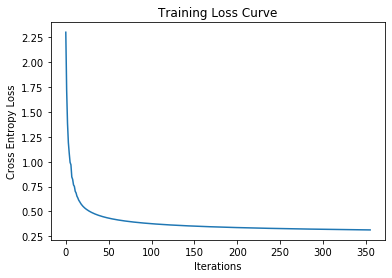

In [26]:
plt.xlabel('Iterations')
plt.ylabel('Cross Entropy Loss')
plt.title('Training Loss Curve')
plt.plot(iterations,neg_log_loss_history)